In [1]:
from google.colab import files

# This will open a file picker to upload your .csv file
uploaded = files.upload()

Saving SupplyChainEmissionFactorsforUSIndustriesCommodities(2015_Summary_Industry) (1).csv to SupplyChainEmissionFactorsforUSIndustriesCommodities(2015_Summary_Industry) (1).csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('SupplyChainEmissionFactorsforUSIndustriesCommodities(2015_Summary_Industry) (1).csv')  # Use the exact file name you uploaded
df.head()  # Shows first 5 rows


,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",Supply Chain Emission Factors without Margins,0.041,0.465,NaN,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.023,0.000,0.023,NaN,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.184,0.017,0.201,NaN,4,2,1,4,1


In [4]:
df_cleaned = df.dropna(subset=['Supply Chain Emission Factors with Margins'])


In [5]:
df.columns


Index(['Industry Code', 'Industry Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins'],
      dtype='object')

In [6]:
df.columns


Index(['Industry Code', 'Industry Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins'],
      dtype='object')

In [7]:
df_cleaned = df.dropna(subset=['Supply Chain Emission Factors with Margins'])


In [8]:
df_cleaned = df_cleaned.drop_duplicates()

In [9]:
top_industries = df_cleaned.groupby('Industry Name')['Supply Chain Emission Factors with Margins'].sum().nlargest(10)

/tmp/ipython-input-10-2036856000.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_industries.values, y=top_industries.index, palette='rocket')


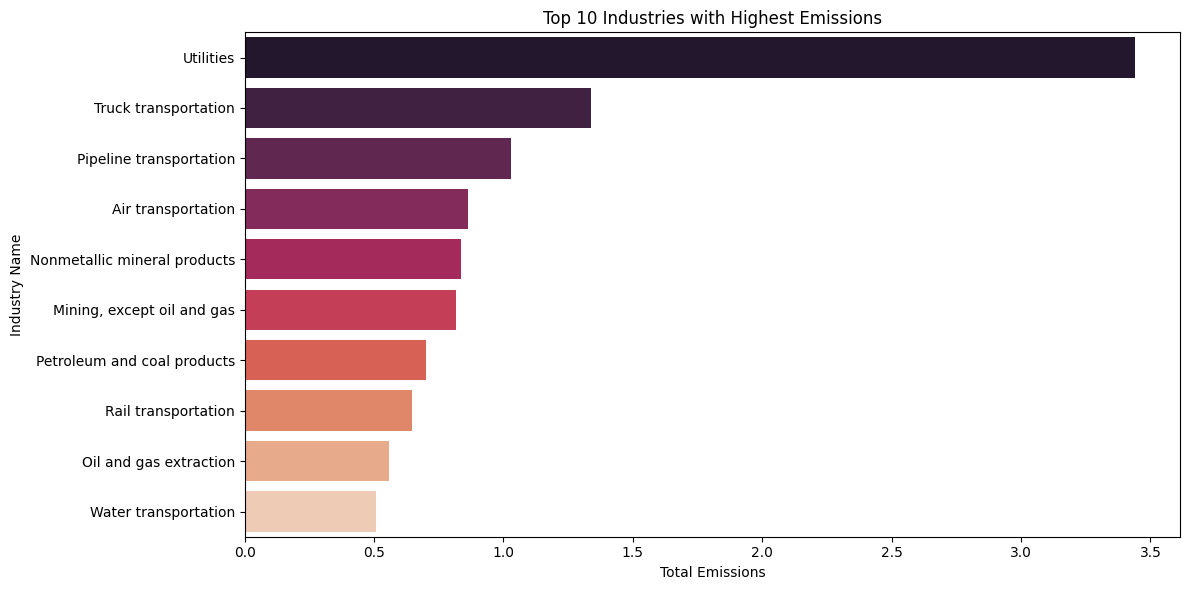

In [10]:
top_industries = df_cleaned.groupby('Industry Name')['Supply Chain Emission Factors with Margins'].sum().nlargest(10)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=top_industries.values, y=top_industries.index, palette='rocket')
plt.title('Top 10 Industries with Highest Emissions')
plt.xlabel('Total Emissions')
plt.ylabel('Industry Name')
plt.tight_layout()
plt.show()

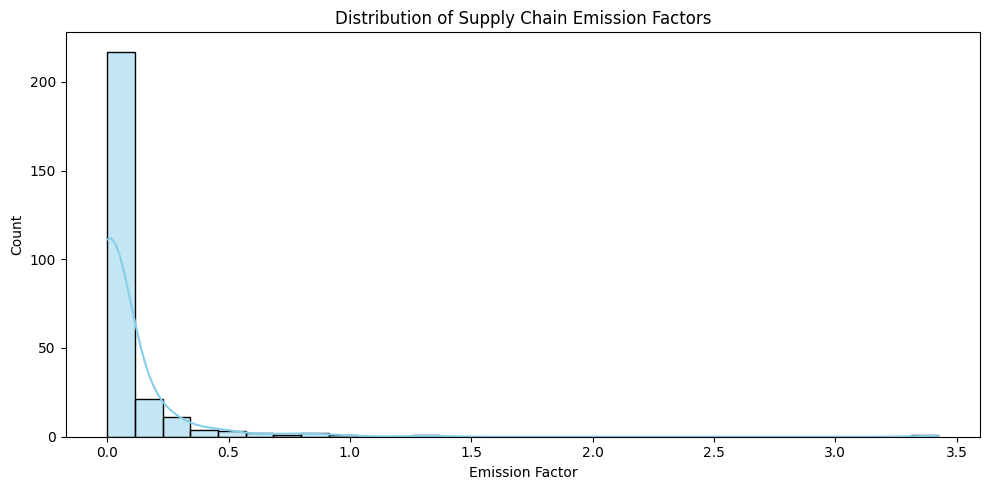

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df_cleaned['Supply Chain Emission Factors with Margins'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Supply Chain Emission Factors')
plt.xlabel('Emission Factor')
plt.ylabel('Count')
plt.tight_layout()
plt.show()